<a href="https://colab.research.google.com/github/chm10/MO443/blob/master/projeto3/Trabalho_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:**Christian Hideki Maekawa  - **RA:** 231867

# Introdução
O objetivo deste trabalho é aplicar técnicas de métodos de limiarização global e local em imagens monocromáticas. Métodos de limiarização global determinam um único valor de limiar para toda a imagem.

Por outro lado, metodos de limiarização adaptativa local calculam um limiar para cada pixel da imagem com base na informação contida em uma vizinhança do pixel. Em ambos os casos, se um pixel p(x, y) na imagem de entrada possuir um valor mais alto que o limiar, entao o pixel p(x, y) e classificado como objeto (preto), caso contrario, ele é rotulado como fundo (branco).


# O Programa
O programa foi implementado usando ubuntu 18.04.5 LTS e python 3.6.9. As bibliotecas utilizadas para este trabalho foram numpy 1.18.5, matplotlib 3.2.2, opencv python 4.1.2.30. e pathlib 1.0.1.

A seguir coloquei os comandos para mostrar as configuração do ambiente.

In [1]:
!lsb_release -d

Description:	Ubuntu 18.04.5 LTS


In [2]:
!python --version

Python 3.6.9


## Como executar
O programa foi desenvolvido para ser executado com o ambiente Colab. Para executar a célula é necessário pressionar `Shift` + `Enter` para cada célula ou pressionar o botão de executar que fica na parte superior esquerda de cada célula.

Algumas vantagens de utilizar o Colab. 
* O código roda num ambiente isolado (ubuntu) usando internet externo;
* Para pessoas sem internet rápida ou computador bom é uma ótima solução;
* Vem com vários pacotes pré instalado evitando problema de instalação e configuração de ambiente;
* Ele executa comandos Ubuntu;
* Podemos baixar repositório do github e instalar o pacote que estiver sendo desenvolvido;
* Facilmente vinculado ao Github e Google drive.

Alguns exclarecimentos sobre alguns códigos.
 
O comando `%%capture` suprime o output, `import sys` será utilizado para verificar se o usuário está executando no Colab ou no jupyter(local).

O caracter `!` indica ao Colab que está executando um comando do ubuntu. 

Ao final do código terá um código para comprimir e baixar as imagens em um arquivo `.zip`.


## Entrada
Imagens baixadas utilizando o wget do Colab. Essas imagens estarão disponíveis no ambiente do Colab para processamento. As imagens foram baixados do  [link](https://www.ic.unicamp.br/~helio/imagens_pgm/).

## Saída
O Programa gera uma imagem que é possível de ser baixado utilizando atalho `Shift` + `Botão direita` >> `Salvar como ...` no formato png. Ao final da seção de código existe um comando para baixar todas as imagens no formato pgm.

# Parâmetros Utilizados
Foram utilizadas imagens extraidas do site. Essas imagens são convertidas para formato vetorizado usando a biblioteca do opencv e servirá de paramêtros para o programa.

# Solução

## Download das imagens
As entradas das soluções são baixadas utilizando o wget. O `sys` é utilizada para distinguir entre o colab e método sem utilizar o colab. São baixadas 7 imagens de exemplo, baboon, monalisa, peppers e watch. 

In [3]:
%%capture
import sys
from pathlib import Path
if 'google.colab' in sys.modules:
  [i.unlink() for i in Path.cwd().rglob("*.pgm*")] # Procura por imagens png e deleta
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/baboon.pgm
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/fiducial.pgm
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/monarch.pgm
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/peppers.pgm
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/retina.pgm
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/sonnet.pgm
  !wget https://www.ic.unicamp.br/~helio/imagens_pgm/wedge.pgm
  !rm -rf sample_data/ # Remove a pasta default do colab
else:
  [i.unlink() for i in Path.cwd().rglob("*.pgm*")]# Procura por imagens png e deleta
  import wget
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/baboon.pgm")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/fiducial.pgm")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/monarch.pgm")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/peppers.pgm")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/retina.pgm")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/sonnet.pgm")
  wget.download("https://www.ic.unicamp.br/~helio/imagens_pgm/wedge.pgm")

## Bibliotecas utilizadas
Foi utilizado o matplotlib para fazer os gráficos, numpy para fazer as operações matemáticas de vetorização e opencv para carregar a imagem e salvar. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Carregar imagem
Para carregar as imagens no programa é utilizada a função `loadImgs` e foi criada uma variável chamada `imgs` para gravar o nome da imagem e o conteúdo vetorizada da imagem com 1 canal no formato GRAYSCALE. Essa estrutura é utilizada para salvar imagem com nome da imagem.

In [5]:
def loadImgs():
  """
  Essa função é responsável por carregar as imagens. Path do pathlib é utilizada para pegar todas 
  as imagens com final pgm da raiz "." o conteúdo vetorizado é armazenado na lista imgs. 
  E o nome dessa imagem fica salvo no dict como referencia na hora salvar.
  """
  imgs = {} # inicia estrutura
  for i in Path('.').glob('*.pgm'): # Procura por  arquivos com final ,pgm
    imgs[i.stem] = cv2.imread(f"./{i}") # Carrega imagem
    if imgs[i.stem].ndim == 3: # Converte para GRAY
      imgs[i.stem] = cv2.cvtColor(imgs[i.stem],cv2.COLOR_BGR2GRAY)
  return imgs

### Gráfico do histograma
Para exibir o histograma e conseguir visualizar  todas as imagens foi construído a função `plotMultiHist`a função também exibe a quantidade de fração de pixels preto presente na imagem.

In [6]:
"""
Função simples para criar histograma.
"""
def plotHist(img):
  plt.hist(img.ravel(),256,[0,256])
  plt.show()
"""
Função customizada para fazer histograma das várias imagens.
"""
def plotMultiHist(imgs,ax):
  color = ("#DC99F5","#D68A85","#93F5C2","#779BD6","#F50105","#F5DBE3","#F5D600") # Carrega as cores para cada imagem
  
  for i,(col,img) in enumerate(zip(color,imgs)): # Para cada imagem gera um histograma e fracoes de pixels pretos
      histr = cv2.calcHist([imgs[img]],[0],None,[256],[-1,256]) # retorna histograma
      frac = round(np.sum(imgs[img] == 0)/ len(imgs[img].ravel()),2)# Calcula o frac de pixels pretos
      line = ax.plot(histr,color = col,label=f"{img} fração={frac}",alpha=0.5) # Histograma com fracao de preto
      ax.set_xlim([-1,256]) # Muda eixo x exibir 0 ate 256
      
  plt.gca().set_yscale("log") # Muda escala de y
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=3, fancybox=True, shadow=True) # Ajusta a legenda
  plt.grid()
  return line

## Algoritmo
Essa parte do relatório estará focada em entender o código, mais a baixo estará a análise de cada método.

### Método Global
O método global está pegando um limiar T que pode ser customizado caso contrário será 128 por padrão e considerará os valores acima desse limiar como branco e abaixo como preto. Esse limiar serve para toda imagem.

In [7]:
"""
Método Global 
Recebe uma imagem e um dict de parametro. (T)
O limiar define se o pixel sera preto ou branco.
"""
def metodo_global(img,param):
  if 'T' in param.keys():
    T=param['T']
  else:
    T=128
    
  result = np.zeros(img.shape)
  result[img > T] =  result[img > T] + 255
  return result.reshape(img.shape)

### Método Local
Os métodos locais diferente do global tem um limiar diferente para cada região nxn.

#### Checar limite da região
Esse método vai dar suporte para os métodos locais para conseguir identificar se o limite da região foi extrapolado na imagem original.

In [8]:
"""
Checa limite da imagem
Verificacao simples se x e y estao dentro da regiao nxm
"""
def check_lim(x,y,n,m):
  return (x >= 0) & (y >=0) & (x < n) & (y < m)

#### Retorna as coordenadas da região
Essa função é responsável por gerar o mapa de coordenada da região nxn. 

In [9]:
"""
Gerador de coodenada para a regiao nxn sendo n impar
Devolve uma lista com as coordenadas
"""
def fun_neighborgh8(size=3):
  assert (size % 2 == 1) & (size >= 3) # Identifica se a região é impar 3x3,5x5,7x7
  origin = (size//2,size//2) # Identifica a origem
  template = np.zeros((size,size)) # Cria mapa de coordenada
  n,m = template.shape # Pega tamanho do mapa
  neighborgh8 = [] # Cria lista para colocar as coordenada no formato de lista
  
  for x in range(0,n):
    for y in range(0,m):
      neighborgh8.append((x - origin[0], y - origin[1])) # Gera as coordenadas
  return neighborgh8 # retorna a lista com as coordenada

#### Retornar o valor da vizinhança
Essa função é responsável por retornar os valores de cada coordenada gerada pela função `fun_neighboargh8` em um numpy array.

In [10]:
"""
Retorna os valores da regiao de interesse dentro da imagem para futuras operacoes
"""
def valueNeighborgh8(map,start,neigh):
  n, m = map.shape # Pega o tamanho do map
  origin = (n//2,m//2) # identifica origem
  result = [] # Gera um lista vazia para armazenar os valores
  
  for i,j in neigh:
    new_x = i+start[0] # Para cada coordenada e aplicada offset 
    new_y = j+start[1] # essa coordenada e checada
    if check_lim(new_x,new_y,n,m) & ((new_x != origin[0]) | (new_y != origin[1])):
      result.append(map[new_x,new_y]) # adicionada a lista
  result=np.array(result,dtype=np.float64)
  return result

#### Método de Bernsen
Primeiro método local que usará as funções acima para conseguir aplicar o método. Ele recebe dois parametros img e param. A imagem e o parâmetro customizado, por padrão é N=3. Ele pega coordenada da imagem original e verifica para cada pixel a região. Para fazer isso é utilizado `valuesNeighboargh8` para conseguir pegar região da imagem, na coordenada (i,j) e pegar as coordenadas do `fun_neighboargh8(N)` sendo N o tamanho da região. Depois de achar os valores da região é armazenada em `result_neighboard8` onde é pego o mínimo e máximo e tirado a média que será limiar para aquele pixel.

In [11]:
"""
Metodo de Bernsen
Faz a media do minimo e maximo da regiao nxn
"""
def metodo_bernsen(img, param):
  if 'N' in param.keys(): # define parametro
    N=param['N']
  else:
    N=3
    
  n, m = img.shape # pega tamanho da imagem
  result = np.zeros(img.shape) # Preenche com zeros a imagem resultante
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N)) # pega regiao
      _min = result_neighborgh8.min() # Pega minimo da regiao
      _max = result_neighborgh8.max() # Pega o maximo da regiao
      T = (_min + _max) / 2 # Faz a media
      if img[i,j] > T: # Se o pixel for maior que limiar sera branco
        result[i,j] = 255
  return result.reshape(img.shape)

#### Método de Niblack
Segundo método chamado Niblack tem dois parametros como entrada, esse parâmetro pode ter o valor de N tamanho da região e k valor que multiplica com desvio padrão. Por padrão N = 3 e k = 0.2. Para fazer o processamento é utilizado a mesma lógica do método acima, mas o limiar é calculado usando $T = media + k*desvio$.

In [12]:
def metodo_niblack(img,param):
  if 'N' in param.keys(): # Carrega os parametros
    N=param['N']
  else:
    N=3
  if 'k' in param.keys():
    k=param['k']
  else:
    k=0.2
  
  n, m = img.shape
  result = np.zeros(img.shape)
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N)) # pega coordenada da regiao
      _mean = result_neighborgh8.mean() # pega media da regiao
      _std = result_neighborgh8.std() # pega o desvio da regiao
      T =  _mean + k*_std # acha o limiar para aquele pixel
      if img[i,j] > T: # se o pixel for maior que limiar sera branco
        result[i,j] = 255 
  return result.reshape(img.shape)

#### Método Sauvola Pietaksinen
Terceiro método chamado Sauvola Pietaksinen tem dois parâmetros como entrada, esse parâmetro pode ter o valor de N, k e R. Por padrão o método tem valor N=3, k=0.5 e R=128. Esse método utiliza a mesma lógica do metodo de cima a diferença se encontra na formula do limiar que utiliza o valor R divindo o valor do desvio.

In [13]:
def metodo_sauvola_pietaksinen(img,param):
  if 'N' in param.keys():# Carrega os parametros
    N=param['N']
  else:
    N=3
  if 'k' in param.keys():
    k=param['k']
  else:
    k=0.5
  if 'R' in param.keys():
    R=param['R']
  else:
    R=128

  n, m = img.shape
  result = np.zeros(img.shape)
  
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N)) # pega coordenada da regiao
      _mean = result_neighborgh8.mean() # pega media da regiao
      _std = result_neighborgh8.std() # pega o desvio da regiao
      T =  _mean * (1 + k*((_std/R)-1)) # acha o limiar para aquele pixel
      if img[i,j] > T: # se o pixel for maior que limiar sera branco
        result[i,j] = 255
  return result.reshape(img.shape)

#### Método de Phansalskar More Sabale
Quarto método chamado de Phansalskar More Sabale tem dois parâmetros como entrada, esse parâmetro pode ser N, k, R, p e q. Por padrão o método pode utilizar o N = 3, k = 0.5, R = 128, p = 2 e q = 10. Esse método utiliza a mesma lógica do metodo de cima a diferença se encontra na formula do limiar que utiliza o valor R divindo o valor do desvio também p como multiplicado e tem q no expoente junto com a média.

In [14]:
def metodo_phansalskar_more_sabale(img,param):
  if 'N' in param.keys():# Carrega os parametros
    N=param['N']
  else:
    N=3
  if 'k' in param.keys():
    k=param['k']
  else:
    k=0.5
  if 'R' in param.keys():
    R=param['R']
  else:
    R=128
  if 'p' in param.keys():
    p=param['p']
  else:
    p=2
  if 'q' in param.keys():
    q=param['q']
  else:
    q=10
  n, m = img.shape
  result = np.zeros(img.shape)
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N))
      _mean = result_neighborgh8.mean()
      _std = result_neighborgh8.std()
      T =  _mean * (1 + (p * np.exp(-q*_mean)) + k * ((_std/R)-1))
      if img[i,j] > T:
        result[i,j] = 255
  return result.reshape(img.shape)

#### Método de Constraste
Quinto método recebe dois parâmetros como entrada, imagem e o parâmetro que por padrão pode ser N=3. Para esse algoritmo reaproveitada a lógica de encontrar a região como citado acima, mas utiliza outra lógica para encontrar o limiar é pego valor do mínimo e o máximo da região e dessa região é utilizada a distância do valor do pixel, então é escolhido o menor valor e esse menor valor é considerado objeto caso contrário é considerado como background.

In [15]:
def metodo_contraste(img,param):
  if 'N' in param.keys():
    N=param['N']
  else:
    N=3

  n, m = img.shape
  result = np.zeros(img.shape)
  
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N))
      _min = result_neighborgh8.min()
      _max = result_neighborgh8.max()
      background = np.abs(img[i,j] - _min) # identifica a distancia do pixel do min
      front = np.abs(img[i,j]-_max) # identifica a distancia do pixel do max
      T = background if background < front else front # escolhe o menor
      if T == background: # o menor valor  background
        result[i,j] = 255
  return result.reshape(img.shape)

#### Método da Média
O sexto método recebe dois parâmetros como entrada, imagem e o parâmetro que por padrão pode ser N=3. Esse algoritmo reaproveita os métodos anteriores diferenciando apenas na parte do limiar. Para esse metodo é calculado limiar para cada pixel da imagem e é visto para limiar a média naquela região e por calcular o limiar para cada pixel é um método diferente do bernsen.  

In [16]:
def metodo_media(img,param):
  if 'N' in param.keys():
    N=param['N']
  else:
    N=3

  n, m = img.shape
  result = np.zeros(img.shape)
  T = np.zeros(img.shape)
  
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N))
      _min = result_neighborgh8.min()
      _max = result_neighborgh8.max()
      T[i,j] = (_min + _max) / 2 # Calcula limiar para todos os pixels
  for i in range(0,n):
    for j in range(0,m):
      _mean = valueNeighborgh8(T,(i,j),fun_neighborgh8(N)).mean() # Para cada pixel calcula media dos limiares
      if img[i,j] < _mean: # Verifica se esta abaixo ou acima da media dos limiares da regiao
        result[i,j] = 255
  return result.reshape(img.shape)

#### Método da mediana
O sétimo método recebe dois parâmetros como entrada, imagem e o parâmetro que por padrão pode ser N=3. Esse algoritmo reaproveita os métodos anteriores diferenciando apenas na parte do limiar. Para esse metodo é calculado limiar para cada pixel da imagem e é visto para limiar a mediana naquela região e por calcular o limiar para cada pixel é um método diferente do bernsen.  

In [17]:
def metodo_mediana(img,param):
  if 'N' in param.keys():
    N=param['N']
  else:
    N=3
    
  n, m = img.shape
  result = np.zeros(img.shape)
  T = np.zeros(img.shape)
  for i in range(0,n):
    for j in range(0,m):
      result_neighborgh8 = valueNeighborgh8(img,(i,j),fun_neighborgh8(N))
      _min = result_neighborgh8.min()
      _max = result_neighborgh8.max()
      T[i,j] = (_min + _max) / 2
  for i in range(0,n):
    for j in range(0,m):
      _median= np.median(valueNeighborgh8(T,(i,j),fun_neighborgh8(N)))
      if img[i,j] < _median:
        result[i,j] = 255
  return result.reshape(img.shape)

### Exibir e salvar imagem
Esse método foi criado para exibir e salvar a imagem. Ele recebe 4 parâmetros sendo apenas o primeiro obrigatório. O primeiro parâmetro contém as imagens em formato `dict`, se apenas o primeiro parâmetro for inserido apenas é exibido as imagens, se o segundo parâmetro é inserido a função computa o método de limerização sobre as imagens na variável `imgs` ela exibi e também salva essa imagem baseado nos parâmetro passado em `param` para identificar que tipo de configuração foi atribuída para a função. Ela pode ser `T=Limiar`, `N=nxn região`,`k`, `R`, `p` e `q`.

In [18]:
def custom_plot(imgs,method={},param={},display_on=True,figsize=(15,15)):
  """
  Essa função exibe a imagem e o output em png.
  """
  assert type(figsize) == tuple, "figsize tem que ser tupla"
  imgs2 = imgs.copy()
  if display_on:
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2) # Inicializa um espaço para 4 imagens
  if len(method) > 0:# identifica se existe um método
    if display_on:
      fig.suptitle(f"Método {list(method)[0]}") # imprimi título
      fig.set_size_inches(figsize[0],figsize[1]) # Tamanho da imagem
    for label in imgs2: # Para cada imagem pegue o nome da imagem
      img = imgs2[label]
      #img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)# Transforma em gray
      img = img.reshape(img.shape[0],img.shape[1],1)
      imgs2[label] = method[list(method)[0]](imgs2[label],param).astype(np.uint8)
      filename = f"{label}_{list(method)[0]}_{'_'.join(f'{_key}={_value}' for _key,_value in param.items())}.pgm" # nome do arquivo
      cv2.imwrite(filename,imgs2[label])
  else: # exibi imagem porque o parâmetro do método veio vazio
    if display_on:
      fig.suptitle(f"Imagens originais")
      fig.set_size_inches(figsize[0],figsize[1])
  if display_on:
      for ax, label in zip(fig.get_axes(),imgs2): # exibe imagens
        img = imgs2[label]
        ax.title.set_text(f"{label}")
        ax.imshow(img,cmap='gray', vmin=0, vmax=255)
        ax.label_outer()
        ax.set_xticks([]), ax.set_yticks([])
      ax8.title.set_text(f"Histograma")
      ax8 = plotMultiHist(imgs2,ax8)

### Imagens Originais
Nessa parte, serão apresentadas as imagens originais para comparação. A função `loadImgs` responsável por carregar as imagens para a memória do programa. A função `custom_plot` é responsável por exibir as imagens customizadas.

Acervo de imagens dict_keys(['fiducial', 'wedge', 'retina', 'peppers', 'monarch', 'baboon', 'sonnet'])


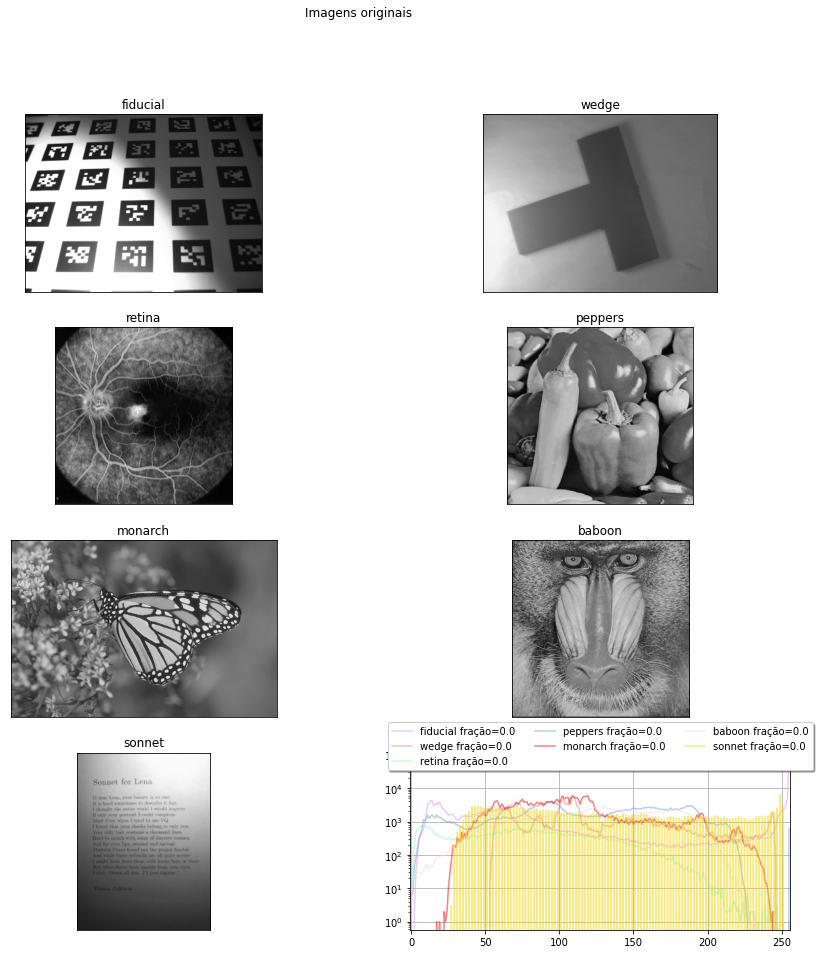

In [19]:
imgs = loadImgs()
print(f"Acervo de imagens {imgs.keys()}")
custom_plot(imgs) 

## Análise
Nessa parte será apresentada as análises de cada método.
### Método global
O método global teve um ótimo resultado para imagens com pouco constrate e com pouco reflexo, sem sombra ou luz. O método conseguiu separar a imagem da borboleta e o fundo, assim como conseguiu exibir bem a imagem da retina. O problema maior  do algoritmo foi com reflexo, luz e sombra. Variando o valor de T usando grid percebeu que o valor deixava a imagem totalmente preta ou totalmente branca degrando cada vez mais a imagem o melhor valor visualmente do limiar foi o valor 128.


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


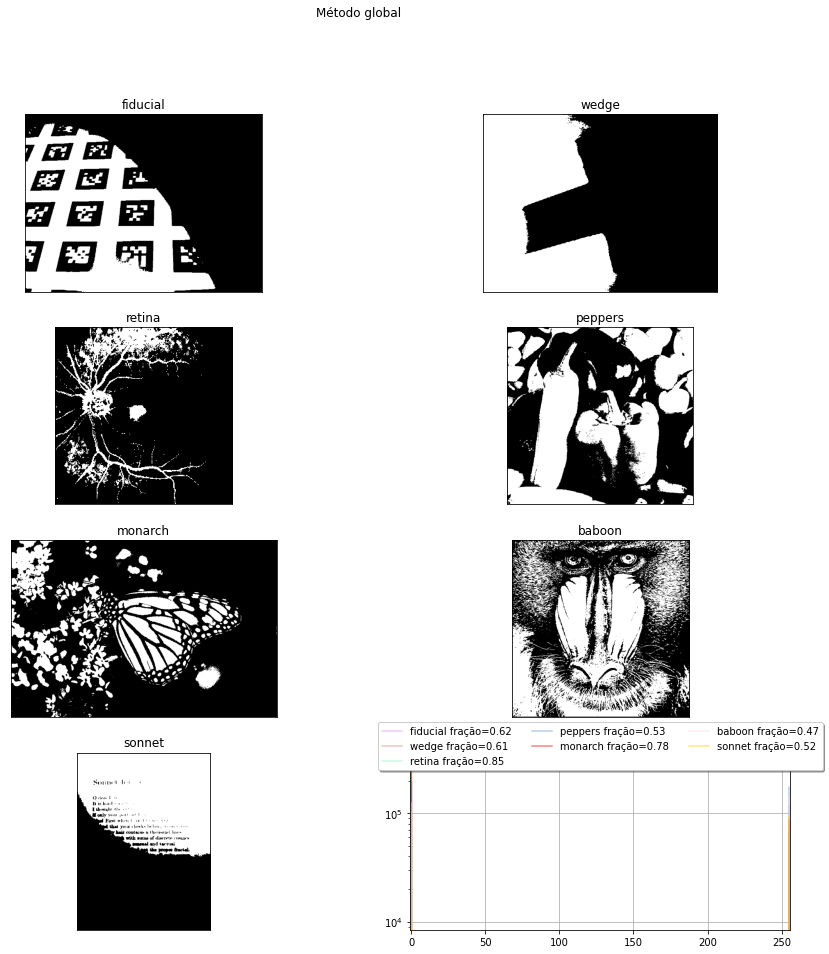

In [20]:
%time
custom_plot(imgs,{'global':metodo_global},param={'T':128})

#### Método de Bernsen
A técnica de bernsen é bastante simples com apenas a média da região foi possível remover a degradação causada pela luz, reflexo e um pouco da sombra. Conseguiu ressaltar melhor as partes que ficaram ruins no método global com um limiar. Mas acabou sofrendo bastante degradação nas imagens com bastante constrate. A sombra ainda teve um impacto maior e as imagens não ficaram muito nítidas. As imagens de sonnet, wedge, retina e fiducial tiveram bom resultado. Fazendo experimento substituindo o N percebeu o que o N ajudava ressaltar melhor as bordas e diminuir o ruido cinza.

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


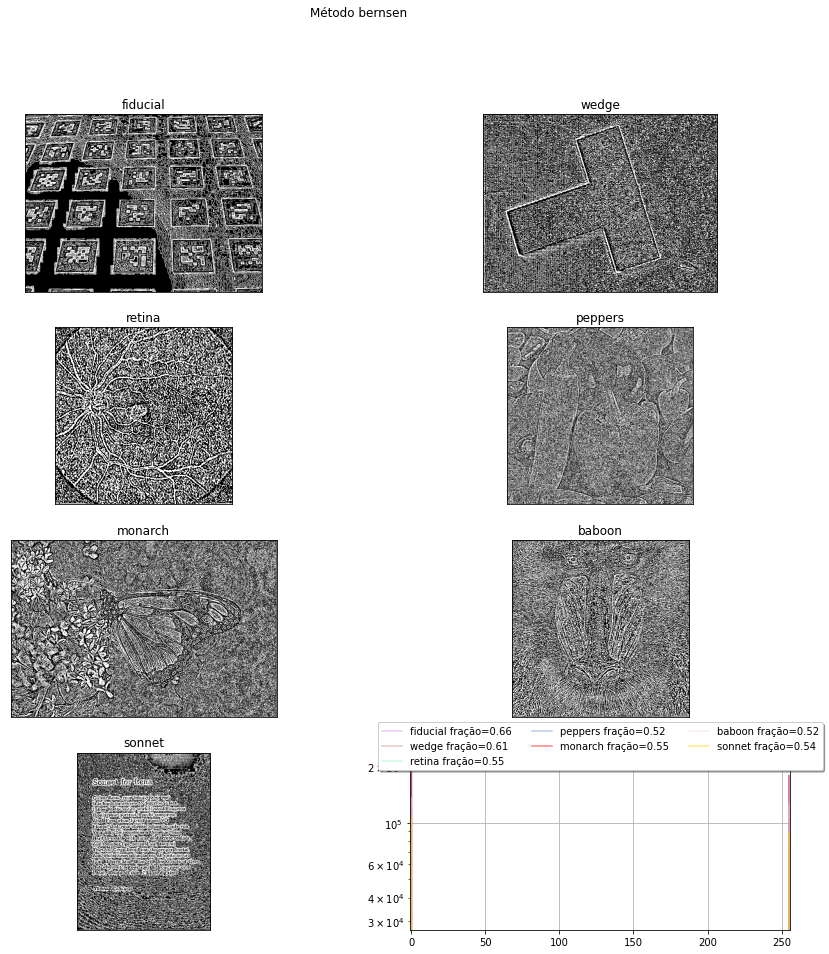

In [21]:
%time
custom_plot(imgs,{'bernsen':metodo_bernsen},param={'N':3})

#### Método de Niblack
O método de Niblack apresentou um resultado mais escuro que bernsen. Como ele leva em consideração também o desvio que esta relacionado a variação dos  pixels vizinhos houve alguns realce a mais. O desvio foi pequeno e o k também então o resultado foi pouco perceptivel. Variando o valor do k percebeu que valor pequeno convergia para resultado do método de bernsen e aumentando ele aumentava o ruído na imagem.O resultado para este caso se parece com barnsen, mas a imagem como da retina ficaram melhores de ocultar o reflexo que acabou sendo afetando quase todos os outros métodos.

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


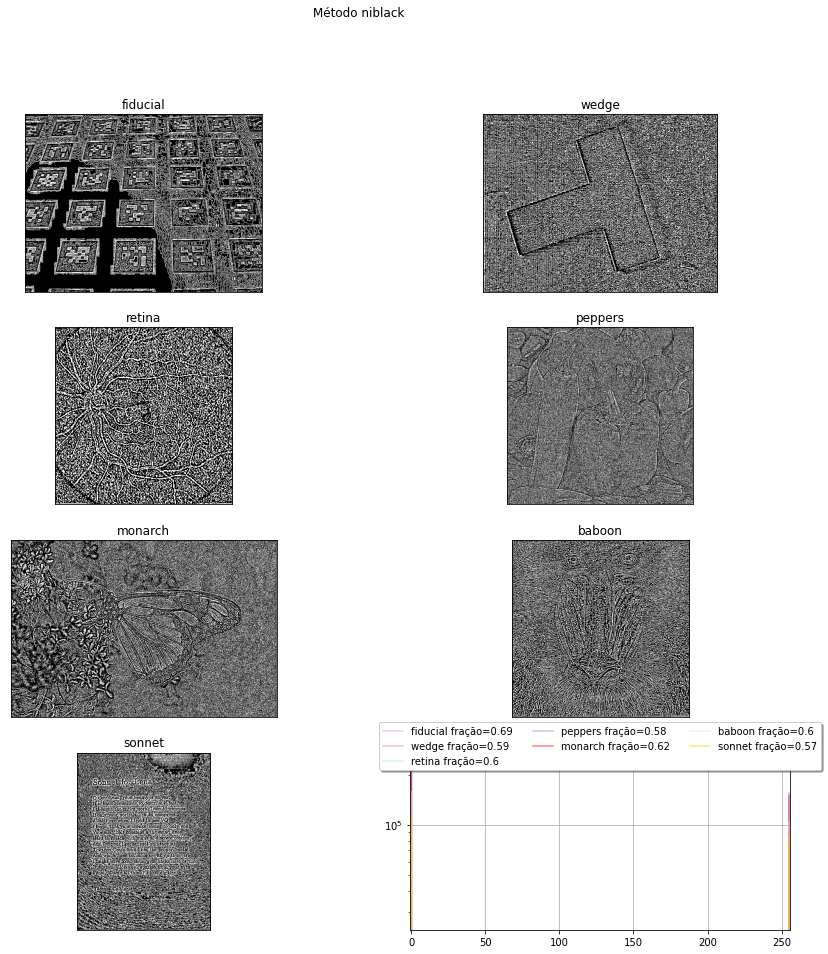

In [22]:
%time
custom_plot(imgs,{'niblack':metodo_niblack},param={'N':3,'k':0.2})

#### Método de Sauvola Pietaksinen
O método de Sauvola Pietaksinen tem o valor do R como forma de normalizar os pixels vizinhos. Variando o valor R com grid observou que as imagens com pouco contraste dentro da vizinhança teve um resultado bem ruim, deixando a imagem quase que preto. Já imagem como monarch, fidicudial,wedge e sonnet tiveram bons resultado. Especificamente o melhor resultado foi sonnet que teve todo seu conteúdo tratado.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


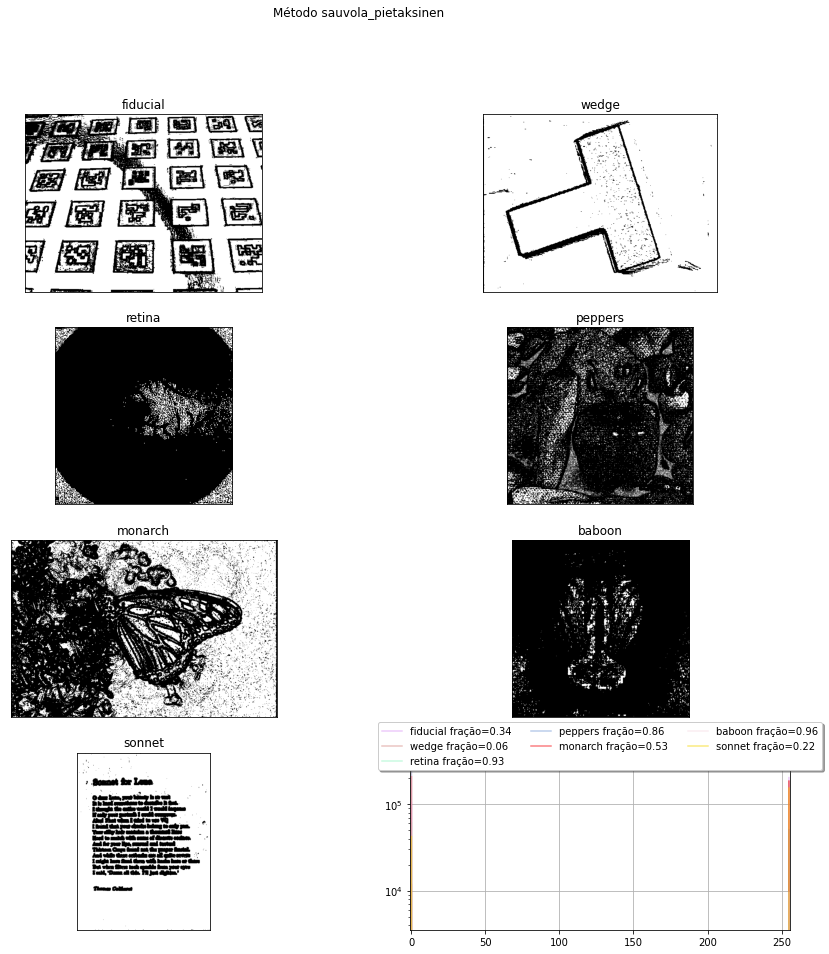

In [23]:
%time
custom_plot(imgs,{'sauvola_pietaksinen':metodo_sauvola_pietaksinen},param={'N':3,'k':0.2,'R':2})

#### Phansalskar More Sabale
O método de Phamsalskar More Sabale, foi o melhor método aplicado, conseguiu separar as regiões de importancia, teve um efeito negativo com relação a algumas imagens por causa da luz. Mas no geral teve um ótimo resultado. O lado negativo do método foi a quantidade de hiperparametro testado para encontrar um bom resultado. O valor R tornava a imagem mais clara quando maior e mais escuro quando menor. O valor  do p deixava a imagem com ruidos e q também deixava imagem menos visivel. 

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.5 µs


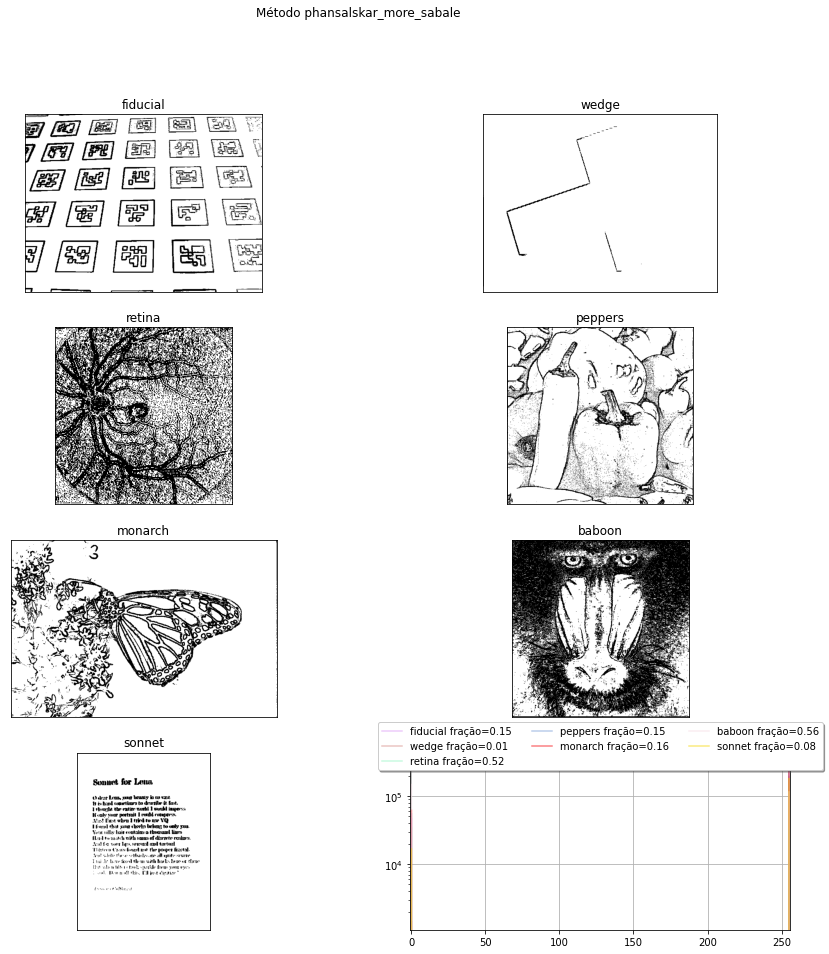

In [24]:
%time
custom_plot(imgs,{'phansalskar_more_sabale':metodo_phansalskar_more_sabale},param={'N':3,'k':0.2,'R':10,'p':2,'q':1})

#### Método do Constrate
Método de Constrate teve um resultado parecido com bernsen e niblack. A diferença que houve um detalhamento maior nas regiões. A variação do N deixava a imagem mais branca e mais próxima de bersen e niblack.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


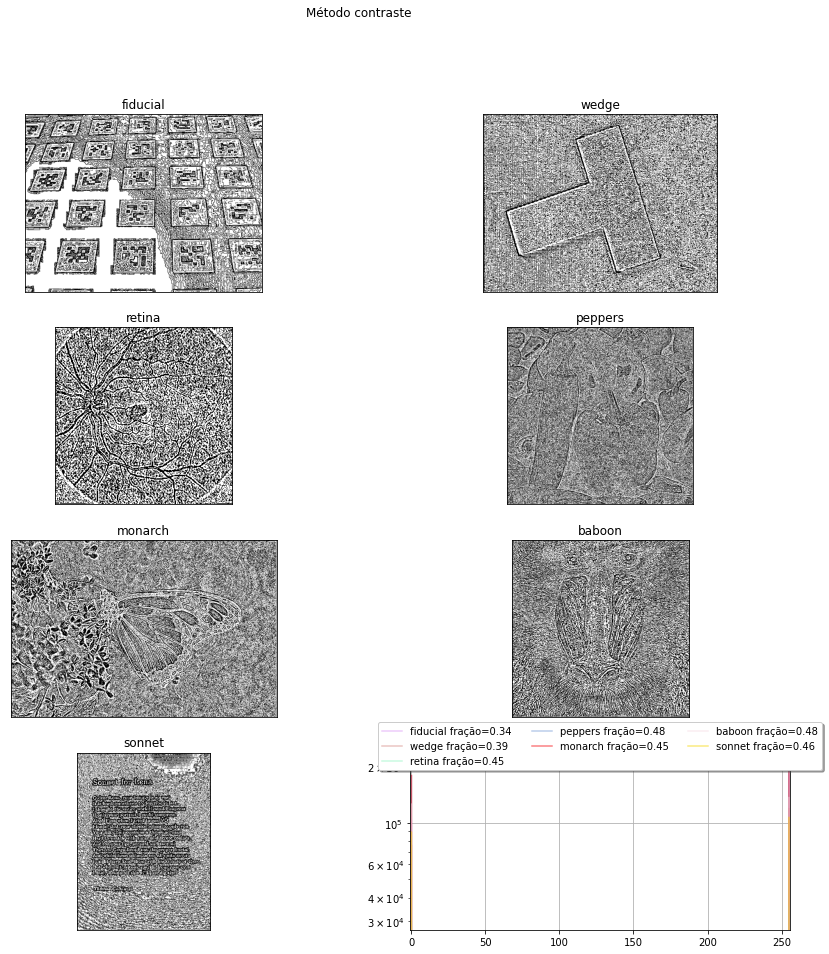

In [25]:
%time
custom_plot(imgs,{'contraste':metodo_contraste},param={'N':3})

#### Método da média
O método da média teve um bom resultado aparentemente teve um resultado bom em reforçar o reace do contorno onde ocorrem as trasições de cores. Ele conseguiu bom resultado para o fiducial, wedge, retina e perppers nas outras imagens também teve um bom resultado, mas outros métodos tiveram um destaque maior. o aumento do valor N faz a imagem pegar uma região maior aumentando o reace e diminuindo N aumentava o numero de ruido. 

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


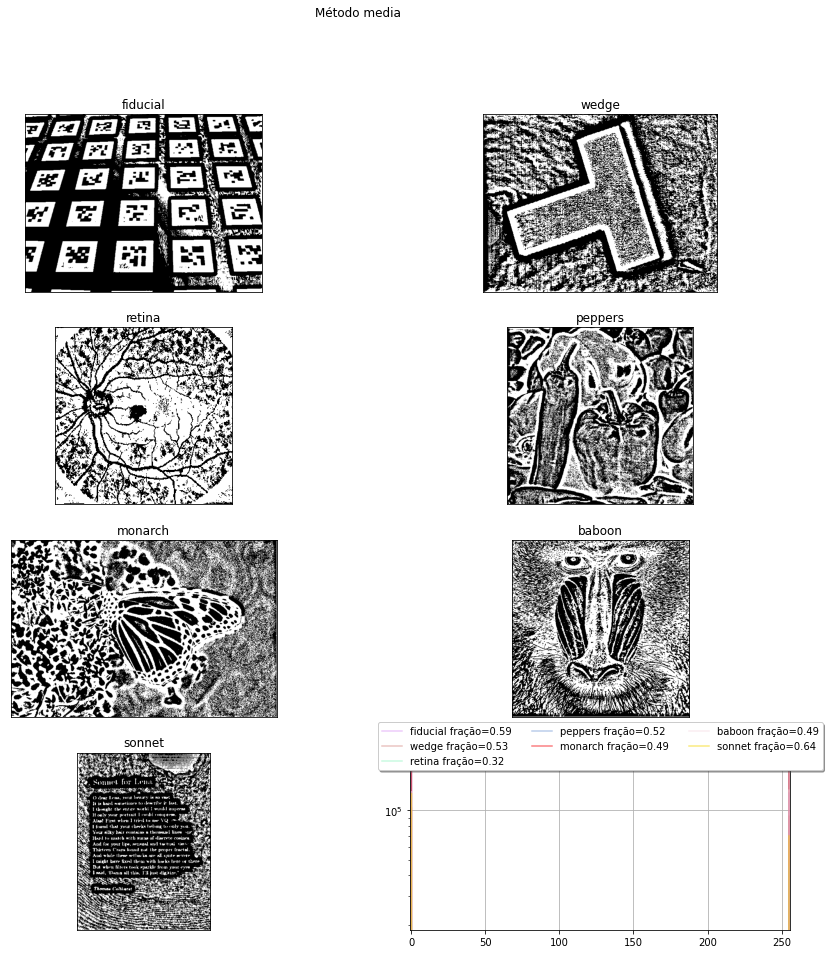

In [26]:
%time
custom_plot(imgs,{'media':metodo_media},param={'N':11})

#### Método da mediana
Teve um efeito bastante interessante a mediana usa a estratégia de pegar o pixel com maior incidencia deixando a imagem com bastante detalhamento de profundidade para tentar separar a imagem do objeto do fundo.

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


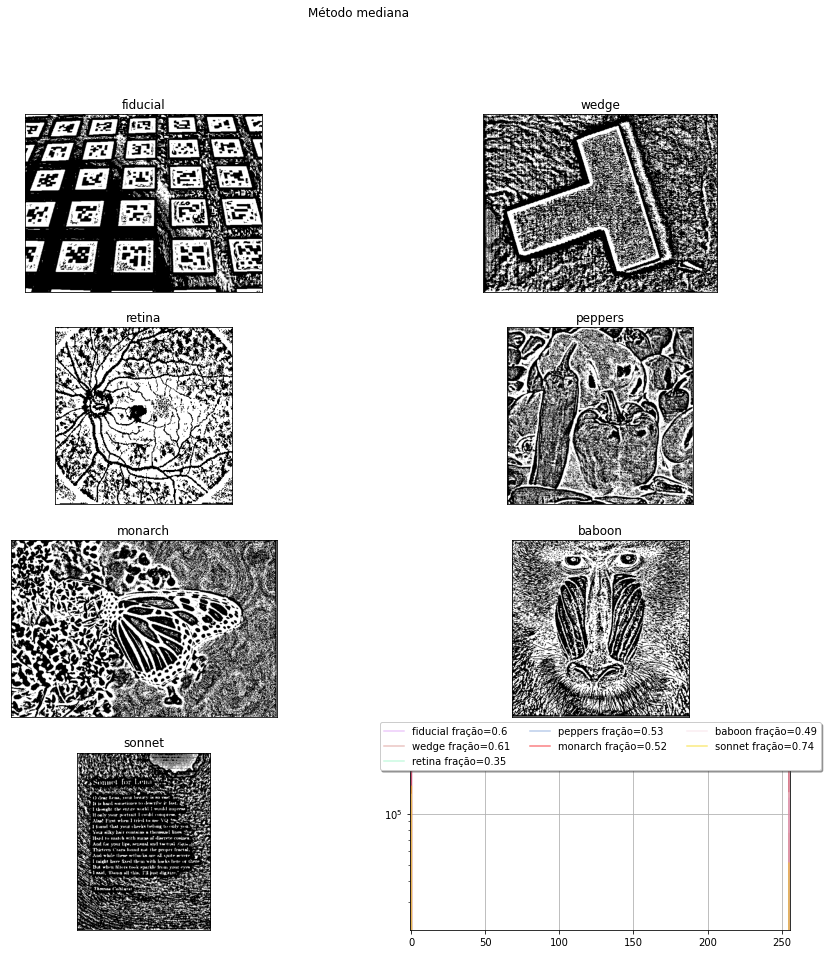

In [27]:
%time
custom_plot(imgs,{'mediana':metodo_mediana},param={'N':9})

## Salvar os arquivos
Salvando as imagens por método. Cada pasta é um método.

In [28]:
methods = {'bernsen',
 'contraste',
 'global',
 'media',
 'mediana',
 'niblack',
 'phansalskar',
 'sauvola'}
for i in methods:
  Path(f"results/{i}").mkdir(parents=True, exist_ok=True)

In [29]:
for i in methods:
    for k in Path('.').glob(f"*{i}*"):
      k.rename(f"results/{i}/{k.name}")
for i in Path('.').glob(f"*.pgm"):
  i.rename(f"results/{i.name}")

### Baixando imagens
Por fim é criado um zip da pasta resultante e conteúdo é baixado.

In [32]:
if 'google.colab' in sys.modules:
  !zip -r /content/projeto3.zip results/
  from google.colab import files
  files.download("/content/projeto3.zip")
else:
  print("Funcionalidade disponível apenas no colab")

updating: results/ (stored 0%)
updating: results/fiducial.pgm (deflated 56%)
updating: results/media/ (stored 0%)
updating: results/contraste/ (stored 0%)
updating: results/contraste/sonnet_contraste_N=3.pgm (deflated 85%)
updating: results/contraste/fiducial_contraste_N=3.pgm (deflated 88%)
updating: results/contraste/retina_contraste_N=3.pgm (deflated 84%)
updating: results/contraste/wedge_contraste_N=3.pgm (deflated 85%)
updating: results/contraste/peppers_contraste_N=3.pgm (deflated 84%)
updating: results/contraste/baboon_contraste_N=3.pgm (deflated 85%)
updating: results/contraste/monarch_contraste_N=3.pgm (deflated 84%)
updating: results/bernsen/ (stored 0%)
updating: results/bernsen/sonnet_bernsen_N=3.pgm (deflated 85%)
updating: results/bernsen/fiducial_bernsen_N=3.pgm (deflated 88%)
updating: results/bernsen/wedge_bernsen_N=3.pgm (deflated 85%)
updating: results/bernsen/peppers_bernsen_N=3.pgm (deflated 84%)
updating: results/bernsen/monarch_bernsen_N=3.pgm (deflated 84%)
upda

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Análise de eficiência
Para esse experimento observou uma complexidade bem baixa para conseguir medir um custo computacional significativo. O algoritmo mais complexo tem uma complexidade $O(n^{2})$. Os algoritmos tiveram uma diferença de $\mu s$, basicamente tiveram o mesmo desempenho. O tamanho dos arquivos são aproximadamente o mesmo visto que tem o mesmo tamanho.

In [31]:
root_directory = Path('results')
for dir in root_directory.iterdir():
  if dir.is_dir():
    print(f"{dir.stem} {round(sum(f.stat().st_size for f in dir.glob('**/*') if f.is_file())/10**6,2)} Mbytes")

media 3.58 Mbytes
contraste 1.79 Mbytes
bernsen 1.79 Mbytes
niblack 1.79 Mbytes
global 1.79 Mbytes
phansalskar 1.79 Mbytes
mediana 0.0 Mbytes
sauvola 1.79 Mbytes


## Busca exaustiva
Essa etapa faz um teste exaustivo para explorar algumas configurações dos métodos. Foi utilizado para incrementar o resultado da análise.

In [ ]:
N_grid = [3,5,7,9]
k_grid = [0.3,0.5,0.7,0.9]
R_grid = [0.3,0.5,0.7,0.9]
p_grid = [2, 10 , 30, 50]
q_grid = [1,10, 30, 50] 
T_grid = [100,128,140]

In [ ]:
for i in T_grid:
  custom_plot(imgs,{'global':metodo_global},param={'T':i},display_on=False)
for i in N_grid:
  custom_plot(imgs,{'bernsen':metodo_bernsen},param={'N':i},display_on=False)
for i in N_grid:
  for j in k_grid:
    custom_plot(imgs,{'niblack':metodo_niblack},param={'N':i,'k':j})
for i in N_grid:
  for j in k_grid:
    for l in R_grid:
      custom_plot(imgs,{'sauvola_pietaksinen':metodo_sauvola_pietaksinen},param={'N':i,'k':j,'R':l},display_on=False)
for i in N_grid:
  for j in k_grid:
    for l in R_grid:
      for o in p_grid:
        for q in q_grid:
          custom_plot(imgs,{'phansalskar_more_sabale':metodo_phansalskar_more_sabale},param={'N':i,'k':j,'R':l,'p':o,'q':q},display_on=False)
for i in N_grid:
  custom_plot(imgs,{'contraste':metodo_contraste},param={'N':i},display_on=False)
for i in N_grid:
  custom_plot(imgs,{'media':metodo_media},param={'N':i},display_on=False)
for i in N_grid:
  custom_plot(imgs,{'mediana':metodo_mediana},param={'N':i},display_on=False)

## Salvando os arquivos da busca

In [ ]:
methods = {'bernsen',
 'contraste',
 'global',
 'media',
 'mediana',
 'niblack',
 'phansalskar',
 'sauvola'}
for i in methods:
  Path(f"grid/{i}").mkdir(parents=True, exist_ok=True)

In [ ]:
for i in methods:
    for k in Path('.').glob(f"*{i}*"):
      k.rename(f"grid/{i}/{k.name}")
for i in Path('.').glob(f"*.pgm"):
  i.rename(f"grid/{i.name}")

In [ ]:
if 'google.colab' in sys.modules:
  !zip -r /content/grid3.zip grid/
  from google.colab import files
  files.download("/content/grid3.zip")
else:
  print("Funcionalidade disponível apenas no colab")

  adding: grid/ (stored 0%)
  adding: grid/sauvola/ (stored 0%)
  adding: grid/media/ (stored 0%)
  adding: grid/contraste/ (stored 0%)
  adding: grid/niblack/ (stored 0%)
  adding: grid/bernsen/ (stored 0%)
  adding: grid/baboon.pgm (deflated 69%)
  adding: grid/retina.pgm (deflated 70%)
  adding: grid/mediana/ (stored 0%)
  adding: grid/peppers.pgm (deflated 75%)
  adding: grid/monarch.pgm (deflated 74%)
  adding: grid/fiducial.pgm (deflated 56%)
  adding: grid/phansalskar/ (stored 0%)
  adding: grid/phansalskar/baboon_phansalskar_more_sabale_N=3_k=0.3_R=0.7_p=2_q=10.pgm (deflated 100%)
  adding: grid/phansalskar/fiducial_phansalskar_more_sabale_N=3_k=0.3_R=0.7_p=10_q=1.pgm (deflated 95%)
  adding: grid/phansalskar/baboon_phansalskar_more_sabale_N=3_k=0.3_R=0.3_p=50_q=10.pgm (deflated 100%)
  adding: grid/phansalskar/baboon_phansalskar_more_sabale_N=3_k=0.3_R=0.5_p=30_q=30.pgm (deflated 100%)
  adding: grid/phansalskar/wedge_phansalskar_more_sabale_N=3_k=0.3_R=0.3_p=2_q=50.pgm (defla

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusão
Para esse projeto concluiu que os métodos de limerização tem resultados interessante para conseguir criar um constrate entre regiões e também entre o objeto e o fundo. A complexidade e tamanho resultante  do processamento é bem baixa. O ponto negativo foi encontrar um ajuste bom para todas as imagens, geralmente um método tinha um destaque em alguns casos e degradava em outros casos dependendo do seu condicionamento. Processar as imagens com várias configurações foi a parte do projeto que mais demandou tempo, observou que os métodos mantinham a frações de pretos medianos para conseguir exibir um bom resultado. Alguns resultandos interessantes obtidos foi a remoção do reflexo da imagem do texto e dos qr code e a indentificação do contorno do objeto mesmo com sombra, identificar contornos mesmo em objetos com próximos e contrante. Seria interessante para serem utilizados como pré processamento caso a imagem sofresse alguma degradação em função da luz, sombra e reflexo. 
